# Fraud detection in financial transactions using machine learning algorithms.


In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
data = pd.read_csv('/content/drive/MyDrive/course_work/transaction.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data = data.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', 'oldbalanceDest': 'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})
data.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.isnull().values.any()

False

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldBalanceOrig  float64
 5   newBalanceOrig  float64
 6   nameDest        object 
 7   oldBalanceDest  float64
 8   newBalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
data.describe()

,step,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
Total_transactions = len(data)
normal = len(data[data.isFraud == 0])
fraudulent = len(data[data.isFraud == 1])
fraud_percentage = round(fraudulent/Total_transactions*100, 2)
print('Total number of Transactions are {}'.format(Total_transactions))
print('Number of Normal Transactions are {}'.format(normal))
print('Number of fraudulent transactions are {}'.format(fraudulent))
print('Percentage of Fraud Transactions is {}'.format(fraud_percentage))

Total number of Transactions are 6362620
Number of Normal Transactions are 6354407
Number of fraudulent transactions are 8213
Percentage of Fraud Transactions is 0.13


In [9]:
not_fraud_percentage = round(normal/Total_transactions*100, 2)
print('Percentage of Normal Transactions is {}'.format(not_fraud_percentage))

Percentage of Normal Transactions is 99.87


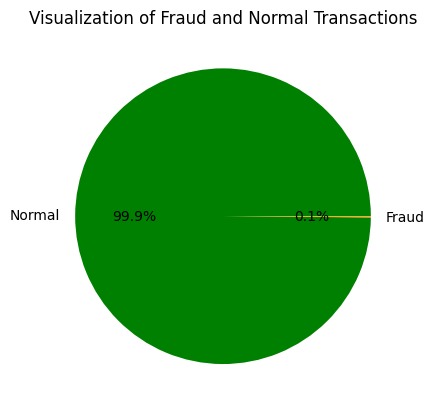

In [10]:
labels = ["Normal", "Fraud"]
count_classes = data['isFraud'].value_counts()

colors = ["green", "orange"]

count_classes.plot(
    kind="pie",
    labels=labels,
    colors=colors,
    autopct='%1.1f%%'
)

plt.title("Visualization of Fraud and Normal Transactions")
plt.ylabel("")
plt.show()


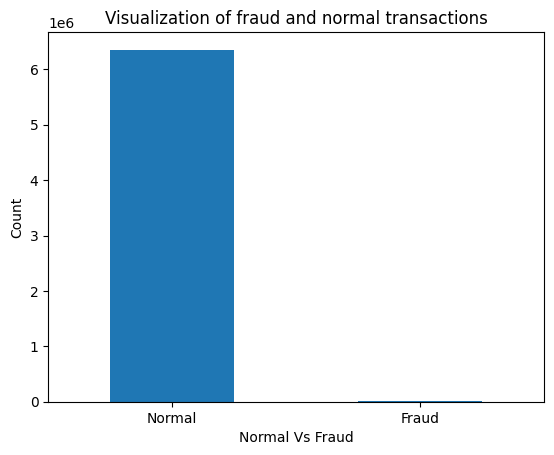

In [11]:
# Visualize
labels = ["Normal", "Fraud"]
count_classes = data.value_counts(data['isFraud'], sort=True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of fraud and normal transactions")
plt.ylabel("Count")
plt.xlabel("Normal Vs Fraud")
plt.xticks(range(2), labels)
plt.show()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


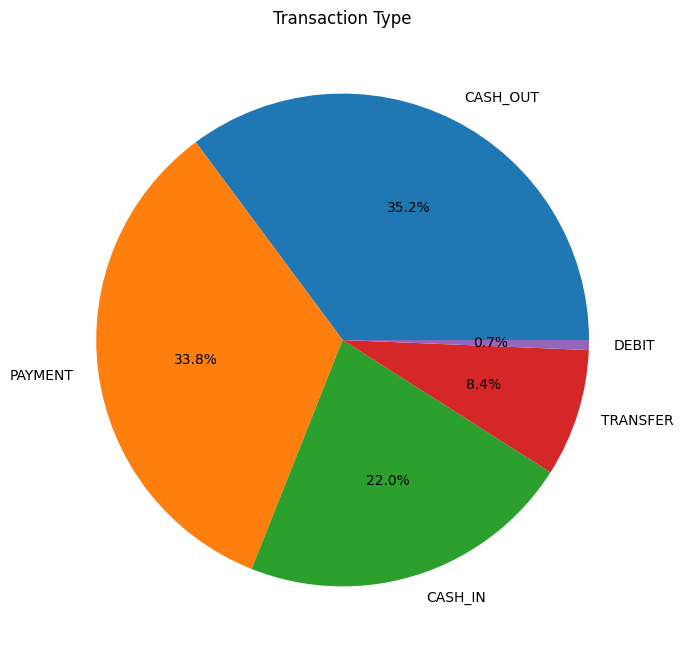

In [12]:
print(data.type.value_counts())

f, ax = plt.subplots(1, 1, figsize=(8,8))
data.type.value_counts().plot(kind='pie', title="Transaction Type", ax=ax, figsize=(8,8), autopct='%1.1f%%')
plt.ylabel("")
plt.show()

In [13]:
fraud_transaction_data = data[(data["isFraud"] == 1)]
fraud_transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8213 entries, 2 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            8213 non-null   int64  
 1   type            8213 non-null   object 
 2   amount          8213 non-null   float64
 3   nameOrig        8213 non-null   object 
 4   oldBalanceOrig  8213 non-null   float64
 5   newBalanceOrig  8213 non-null   float64
 6   nameDest        8213 non-null   object 
 7   oldBalanceDest  8213 non-null   float64
 8   newBalanceDest  8213 non-null   float64
 9   isFraud         8213 non-null   int64  
 10  isFlaggedFraud  8213 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 770.0+ KB


In [14]:
non_fraud = len(fraud_transaction_data[fraud_transaction_data.isFraud == 0])
fraud = len(fraud_transaction_data[fraud_transaction_data.isFraud == 1])
print(non_fraud)
print(fraud)

0
8213


In [15]:
fraud_transaction_data.describe()

,step,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
count,8213.000000,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8213.0,8213.000000
mean,368.413856,1.467967e+06,1.649668e+06,1.923926e+05,5.442496e+05,1.279708e+06,1.0,0.001948
std,216.388690,2.404253e+06,3.547719e+06,1.965666e+06,3.336421e+06,3.908817e+06,0.0,0.044097
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
25%,181.000000,1.270913e+05,1.258224e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
50%,367.000000,4.414234e+05,4.389835e+05,0.000000e+00,0.000000e+00,4.676420e+03,1.0,0.000000
75%,558.000000,1.517771e+06,1.517771e+06,0.000000e+00,1.478287e+05,1.058725e+06,1.0,0.000000
max,743.000000,1.000000e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.0,1.000000


In [16]:
fraud_transaction_data.describe(include=['object'])

,type,nameOrig,nameDest
count,8213,8213,8213
unique,2,8213,8169
top,CASH_OUT,C1305486145,C1193568854
freq,4116,1,2


In [17]:
new_data = data.loc[data['type'].isin(['CASH_OUT', 'TRANSFER']),:]
print('The new dataframe now has', len(new_data), 'transactions.')

The new dataframe now has 2770409 transactions.


In [18]:
new_data.describe(include=['object'])

,type,nameOrig,nameDest
count,2770409,2770409,2770409
unique,2,2768630,509565
top,CASH_OUT,C724452879,C1286084959
freq,2237500,3,75


In [19]:
print("Number of transactions where the transaction amount is negative: " + str(sum(new_data['amount'] < 0)))

print("Number of transactions where the transaction amount is 0: " + str(sum(new_data['amount'] == 0)))

Number of transactions where the transaction amount is negative: 0
Number of transactions where the transaction amount is 0: 16


In [20]:
trans_0 = new_data[new_data['amount'] == 0]
trans_0

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


In [21]:
new_data = new_data.loc[new_data['amount'] > 0,:]

In [22]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2770393 entries, 2 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldBalanceOrig  float64
 5   newBalanceOrig  float64
 6   nameDest        object 
 7   oldBalanceDest  float64
 8   newBalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 253.6+ MB


In [23]:
new_data_count = len(new_data)
orig_initial_balance = len(new_data[new_data.oldBalanceOrig == 0])
print("Percentage of transactions where originator's initial balance is 0: " + str(round((orig_initial_balance/new_data_count)*100, 2)))
dest_final_balance = len(new_data[new_data.newBalanceDest == 0])
print("Percentage of transactions where destination's final balance is 0: " + str(round(dest_final_balance/new_data_count*100, 2)))

Percentage of transactions where originator's initial balance is 0: 47.23
Percentage of transactions where destination's final balance is 0: 0.6


In [24]:
new_data['dest_final_balance'] = new_data['oldBalanceDest'] + new_data['amount']
new_data.head()
new_data['orig_final_balance'] = new_data['oldBalanceOrig'] - new_data['amount']
new_data.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,dest_final_balance,orig_final_balance
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.00,0.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,21363.00,0.00
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,234216.94,-213808.94
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,237735.30,-214605.30
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,317952.89,-300850.89


In [25]:
# Фильтруем транзакции на сумму больше 200,000
large_transfers = data[data['amount'] > 200_000]

# Проверяем, были ли такие транзакции помечены как мошеннические
large_transfers['is_fraudulent'] = large_transfers['isFraud'] == 1

# Смотрим, сколько из этих транзакций было мошенническими
fraudulent_count = large_transfers['is_fraudulent'].sum()
total_large_transfers = len(large_transfers)

# Вывод результатов
print(f"Общее количество переводов > 200,000: {total_large_transfers}")
print(f"Из них мошеннических: {fraudulent_count}")
print(f"Доля мошеннических переводов: {fraudulent_count / total_large_transfers:.2%}")

# Вывод первых нескольких записей для проверки
print(large_transfers[['amount', 'isFraud', 'isFlaggedFraud', 'is_fraudulent']].head())

Общее количество переводов > 200,000: 1673570
Из них мошеннических: 5471
Доля мошеннических переводов: 0.33%
       amount  isFraud  isFlaggedFraud  is_fraudulent
15  229133.94        0               0          False
19  215310.30        0               0          False
24  311685.89        0               0          False
82  224606.64        0               0          False
84  379856.23        0               0          False


<ipython-input-25-aef41ca1929a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  large_transfers['is_fraudulent'] = large_transfers['isFraud'] == 1


In [26]:
c1 = len(new_data[new_data.newBalanceDest != new_data.dest_final_balance])
print("Transation where destination balance are not accurately captured: "+ str(round(c1/new_data_count*100, 2)))

c2 = len(new_data[new_data.newBalanceOrig != new_data.orig_final_balance])
print("Transactions where originator balances are not accurately captured: " + str(round(c2/new_data_count*100, 2)))

Transation where destination balance are not accurately captured: 42.09
Transactions where originator balances are not accurately captured: 93.72


In [27]:
fraud_trans = len(new_data[new_data.isFraud == 1])
c3 = len(new_data[(new_data.oldBalanceOrig == 0) & (new_data.isFraud == 1)])
print("% of fraudulent transactions where initial balance of orginator is 0: " + str(round(c3/fraud_trans*100, 2)))

gen_trans = len(new_data[new_data.isFraud == 0])
c4 = len(new_data[(new_data.oldBalanceOrig == 0) & (new_data.isFraud == 0)])
print("% of genuine transactions where initial balance of originator is 0: " + str(round(c4/gen_trans*100, 2)))

% of fraudulent transactions where initial balance of orginator is 0: 0.3
% of genuine transactions where initial balance of originator is 0: 47.37


In [28]:
new_data['origBalance_inacc'] = (new_data['oldBalanceOrig'] - new_data['amount']) - new_data['newBalanceOrig']
new_data['destBalance_inacc'] = (new_data['oldBalanceDest'] + new_data['amount']) - new_data['newBalanceDest']
new_data.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,dest_final_balance,orig_final_balance,origBalance_inacc,destBalance_inacc
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.00,0.00,0.00,181.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,21363.00,0.00,0.00,21363.0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,234216.94,-213808.94,-213808.94,182703.5
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,237735.30,-214605.30,-214605.30,237735.3
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,317952.89,-300850.89,-300850.89,-2401220.0


In [29]:
new_data = new_data.drop(['nameOrig', 'nameDest','dest_final_balance', 'orig_final_balance', 'isFlaggedFraud'], axis=1)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2770393 entries, 2 to 6362619
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   step               int64  
 1   type               object 
 2   amount             float64
 3   oldBalanceOrig     float64
 4   newBalanceOrig     float64
 5   oldBalanceDest     float64
 6   newBalanceDest     float64
 7   isFraud            int64  
 8   origBalance_inacc  float64
 9   destBalance_inacc  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 232.5+ MB


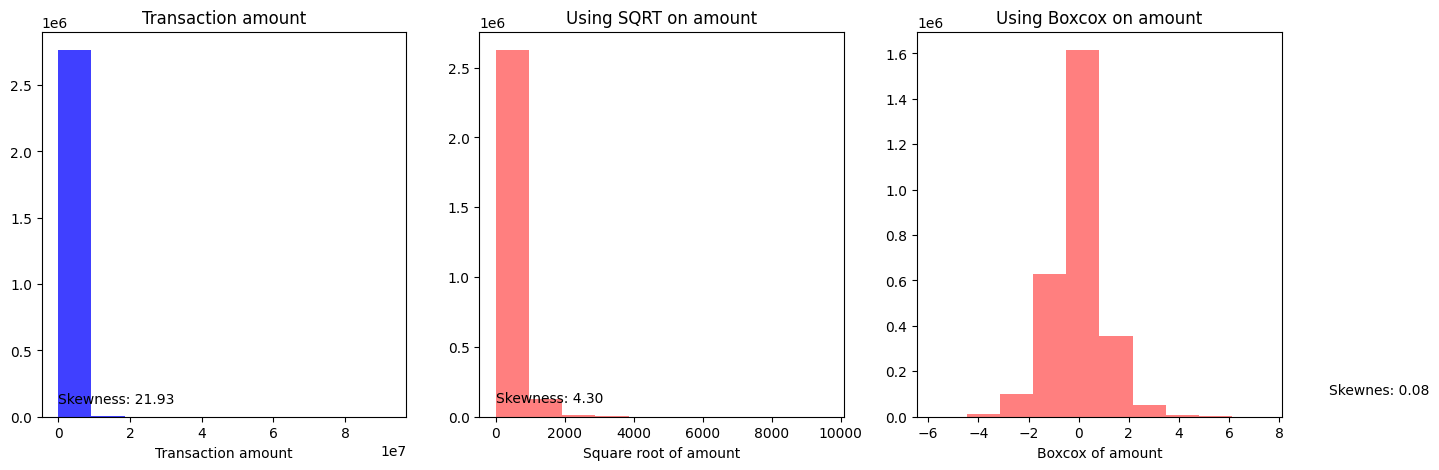

In [30]:
from scipy.stats import skew, boxcox
from sklearn import preprocessing

new_data['amount_boxcox'] = preprocessing.scale(boxcox(new_data['amount']+1)[0])

figure = plt.figure(figsize=(16, 5))
figure.add_subplot(131)
plt.hist(new_data['amount'], facecolor='blue', alpha=0.75)
plt.xlabel("Transaction amount")
plt.title("Transaction amount")
plt.text(10, 100000, "Skewness: {0:.2f}".format(skew(new_data['amount'])))

figure.add_subplot(132)
plt.hist(np.sqrt(new_data['amount']), facecolor = 'red', alpha=0.5)
plt.xlabel("Square root of amount")
plt.title("Using SQRT on amount")
plt.text(10,100000, "Skewness: {0:.2f}".format(skew(np.sqrt(new_data['amount']))))

figure.add_subplot(133)
plt.hist(new_data['amount_boxcox'], facecolor = "red", alpha=0.5)
plt.xlabel("Boxcox of amount")
plt.title("Using Boxcox on amount")
plt.text(10, 100000, "Skewnes: {0:.2f}".format(skew(new_data['amount_boxcox'])))

plt.show()

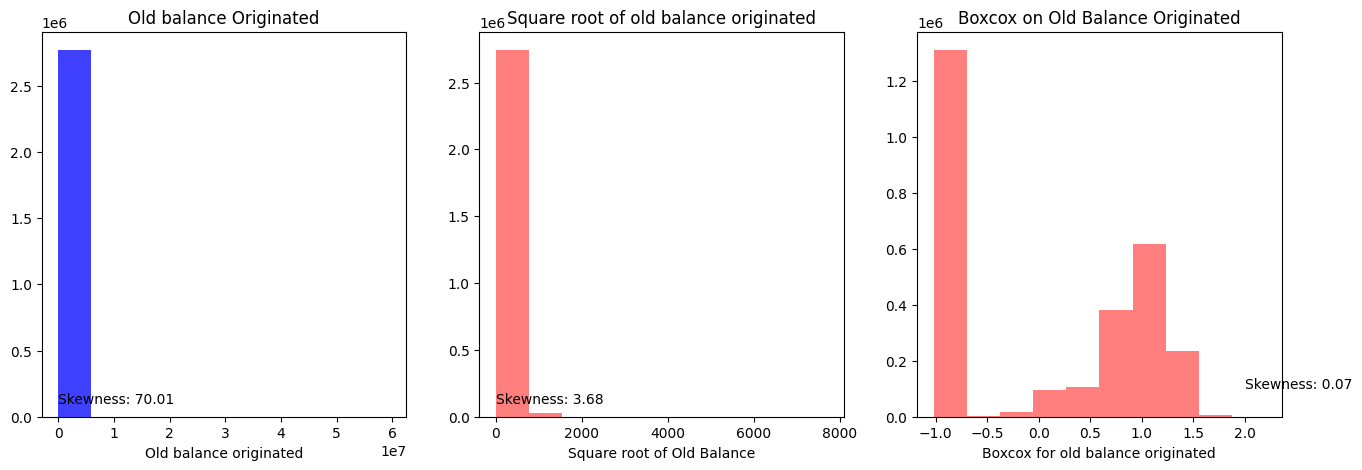

In [31]:
new_data['oldBalanceOrig_boxcox'] = preprocessing.scale(boxcox(new_data['oldBalanceOrig']+1)[0])

figure = plt.figure(figsize=(16, 5))
figure.add_subplot(131)
plt.hist(new_data['oldBalanceOrig'], facecolor='blue', alpha=0.75)
plt.xlabel('Old balance originated')
plt.title("Old balance Originated")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(new_data["oldBalanceOrig"])))

figure.add_subplot(132)
plt.hist(np.sqrt(new_data['oldBalanceOrig']), facecolor="red", alpha=0.5)
plt.xlabel("Square root of Old Balance")
plt.title("Square root of old balance originated")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(np.sqrt(new_data['oldBalanceOrig']))))

figure.add_subplot(133)
plt.hist(new_data['oldBalanceOrig_boxcox'], facecolor = "red", alpha=0.5)
plt.xlabel("Boxcox for old balance originated")
plt.title("Boxcox on Old Balance Originated")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(new_data['oldBalanceOrig_boxcox'])))

plt.show()

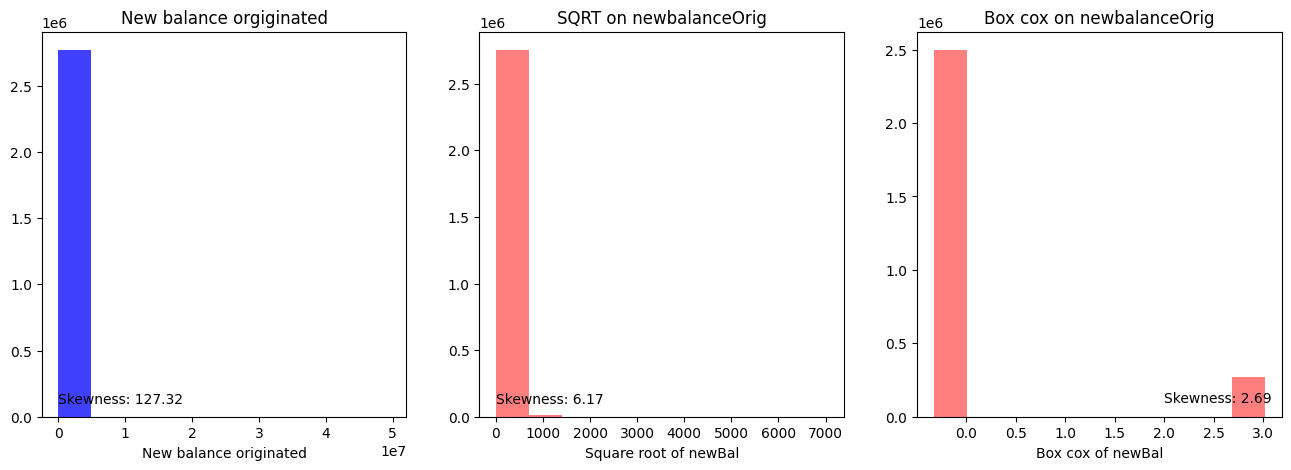

In [32]:
new_data['newbalanceOrg_boxcox'] = preprocessing.scale(boxcox(new_data['newBalanceOrig']+1)[0])

figure = plt.figure(figsize=(16, 5))
figure.add_subplot(131)
plt.hist(new_data['newBalanceOrig'] ,facecolor='blue',alpha=0.75)
plt.xlabel("New balance originated")
plt.title("New balance orgiginated")
plt.text(2,100000,"Skewness: {0:.2f}".format(skew(new_data['newBalanceOrig'])))


figure.add_subplot(132)
plt.hist(np.sqrt(new_data['newBalanceOrig']), facecolor = 'red', alpha=0.5)
plt.xlabel("Square root of newBal")
plt.title("SQRT on newbalanceOrig")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(np.sqrt(new_data['newBalanceOrig']))))

figure.add_subplot(133)
plt.hist(new_data['newbalanceOrg_boxcox'], facecolor = 'red', alpha=0.5)
plt.xlabel("Box cox of newBal")
plt.title("Box cox on newbalanceOrig")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(new_data['newbalanceOrg_boxcox'])))

plt.show()

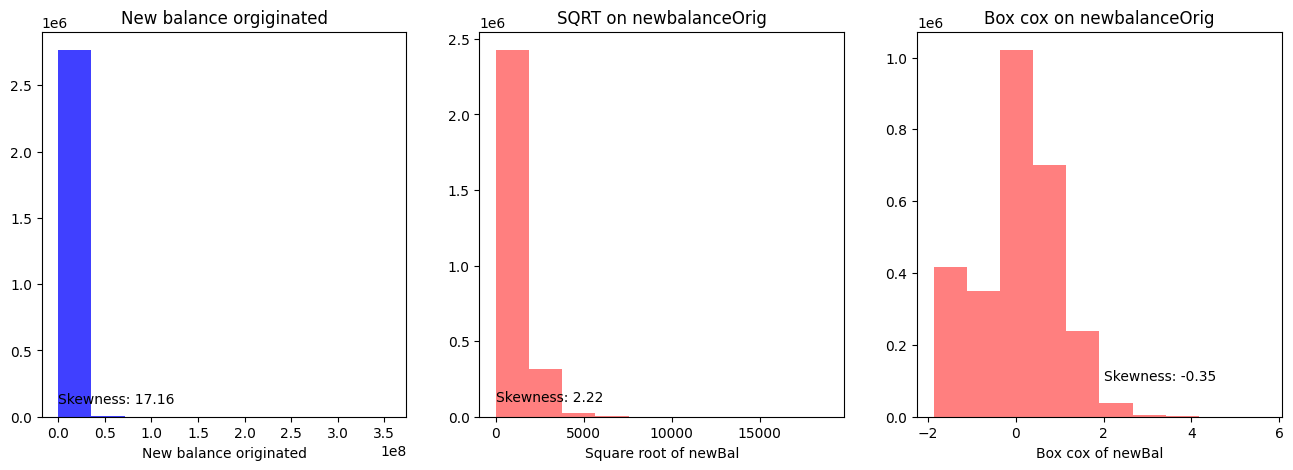

In [33]:
new_data['oldBalanceDest_boxcox'] = preprocessing.scale(boxcox(new_data['oldBalanceDest']+1)[0])

figure = plt.figure(figsize=(16, 5))
figure.add_subplot(131)
plt.hist(new_data['oldBalanceDest'] ,facecolor='blue',alpha=0.75)
plt.xlabel("New balance originated")
plt.title("New balance orgiginated")
plt.text(2,100000,"Skewness: {0:.2f}".format(skew(new_data['oldBalanceDest'])))


figure.add_subplot(132)
plt.hist(np.sqrt(new_data['oldBalanceDest']), facecolor = 'red', alpha=0.5)
plt.xlabel("Square root of newBal")
plt.title("SQRT on newbalanceOrig")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(np.sqrt(new_data['oldBalanceDest']))))

figure.add_subplot(133)
plt.hist(new_data['oldBalanceDest_boxcox'], facecolor = 'red', alpha=0.5)
plt.xlabel("Box cox of newBal")
plt.title("Box cox on newbalanceOrig")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(new_data['oldBalanceDest_boxcox'])))

plt.show()

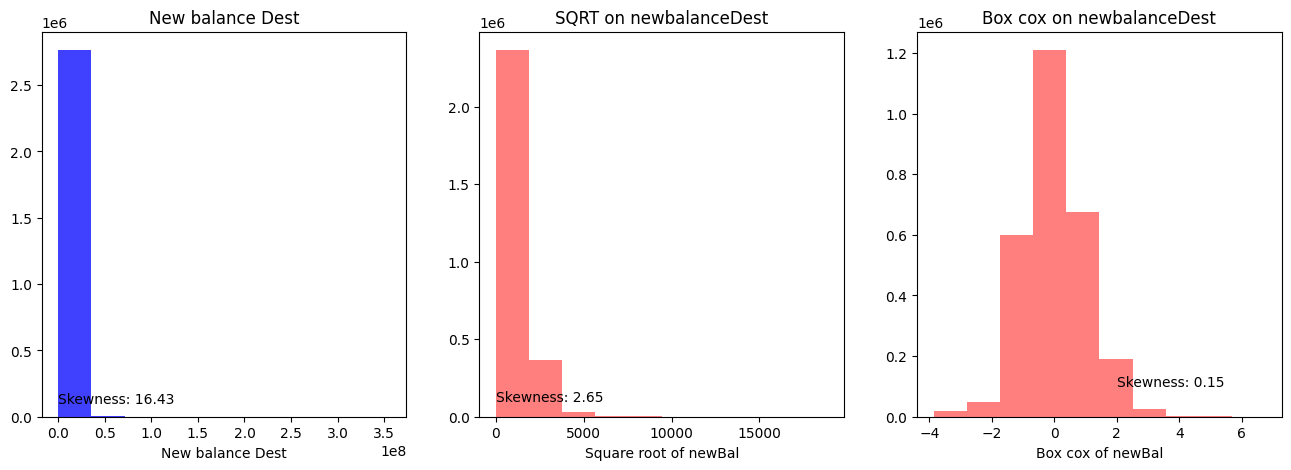

In [34]:
new_data['newBalanceDest_boxcox'] = preprocessing.scale(boxcox(new_data['newBalanceDest']+1)[0])

figure = plt.figure(figsize=(16, 5))
figure.add_subplot(131)
plt.hist(new_data['newBalanceDest'] ,facecolor='blue',alpha=0.75)
plt.xlabel("New balance Dest")
plt.title("New balance Dest")
plt.text(2,100000,"Skewness: {0:.2f}".format(skew(new_data['newBalanceDest'])))


figure.add_subplot(132)
plt.hist(np.sqrt(new_data['newBalanceDest']), facecolor = 'red', alpha=0.5)
plt.xlabel("Square root of newBal")
plt.title("SQRT on newbalanceDest")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(np.sqrt(new_data['newBalanceDest']))))

figure.add_subplot(133)
plt.hist(new_data['newBalanceDest_boxcox'], facecolor = 'red', alpha=0.5)
plt.xlabel("Box cox of newBal")
plt.title("Box cox on newbalanceDest")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(new_data['newBalanceDest_boxcox'])))

plt.show()

In [35]:
new_data.head()

,step,type,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,origBalance_inacc,destBalance_inacc,amount_boxcox,oldBalanceOrig_boxcox,newbalanceOrg_boxcox,oldBalanceDest_boxcox,newBalanceDest_boxcox
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1,0.00,181.0,-4.099565,0.039552,-0.331129,-1.873358,-3.863426
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1,0.00,21363.0,-4.099565,0.039552,-0.331129,-0.917302,-3.863426
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0,-213808.94,182703.5,0.288017,0.856866,-0.331129,-1.191655,-1.591635
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0,-214605.30,237735.3,0.234390,0.297408,-0.331129,-0.904636,-3.863426
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0,-300850.89,-2401220.0,0.558227,0.795600,-0.331129,-1.156123,0.805227


In [36]:
print("The fraud transaction of the filtered dataset: {0:.4f}%".format((len(new_data[new_data.isFraud == 1])/len(new_data))*100))

The fraud transaction of the filtered dataset: 0.2959%


In [37]:
new_data.drop(["oldBalanceOrig", "newBalanceOrig", "oldBalanceDest", "newBalanceDest", "amount", "type", "origBalance_inacc", "destBalance_inacc", "step"], axis=1, inplace=True)
new_data.head()

,isFraud,amount_boxcox,oldBalanceOrig_boxcox,newbalanceOrg_boxcox,oldBalanceDest_boxcox,newBalanceDest_boxcox
2,1,-4.099565,0.039552,-0.331129,-1.873358,-3.863426
3,1,-4.099565,0.039552,-0.331129,-0.917302,-3.863426
15,0,0.288017,0.856866,-0.331129,-1.191655,-1.591635
19,0,0.234390,0.297408,-0.331129,-0.904636,-3.863426
24,0,0.558227,0.795600,-0.331129,-1.156123,0.805227


In [38]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2770393 entries, 2 to 6362619
Data columns (total 6 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   isFraud                int64  
 1   amount_boxcox          float64
 2   oldBalanceOrig_boxcox  float64
 3   newbalanceOrg_boxcox   float64
 4   oldBalanceDest_boxcox  float64
 5   newBalanceDest_boxcox  float64
dtypes: float64(5), int64(1)
memory usage: 148.0 MB


In [39]:
X = new_data.iloc[:, new_data.columns != 'isFraud']
y = new_data.iloc[:, new_data.columns == 'isFraud']

In [40]:
number_records_fraud = len(new_data[new_data.isFraud == 1])
fraud_indices = new_data[new_data.isFraud == 1].index.values

normal_indices = new_data[new_data.isFraud == 0].index

random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
under_sample_data = new_data.loc[under_sample_indices, :]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'isFraud']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'isFraud']

print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.isFraud == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.isFraud == 1])/len(under_sample_data))
print("Total number of transactions in resample data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resample data:  16394


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Number of transactions in train dataset: ", format(len(X_train), ",d"))
print("Number of transactions in test dataset: ", format(len(X_test), ",d"))
print("Total number of transactions: ", format(len(X_train)+len(X_test),",d"))

X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample, y_undersample, test_size = 0.2, random_state=0)

print("Number transactions train dataset: ", format(len(X_train_undersample),',d'))
print("Number transactions test dataset: ", format(len(X_test_undersample),',d'))
print("Total number of transactions: ", format(len(X_train_undersample)+len(X_test_undersample),',d'))

Number of transactions in train dataset:  2,216,314
Number of transactions in test dataset:  554,079
Total number of transactions:  2,770,393
Number transactions train dataset:  13,115
Number transactions test dataset:  3,279
Total number of transactions:  16,394


In [44]:
from sklearn.linear_model import LogisticRegression
from  sklearn import metrics
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_undersample = label_encoder.fit_transform(y_train_undersample.values.ravel())
y_test_undersample = label_encoder.fit_transform(y_test_undersample.values.ravel())

logreg = LogisticRegression()
logreg.fit(X_train_undersample, y_train_undersample)

LogisticRegression()

In [47]:
y_pred = logreg.predict(X_test_undersample)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_undersample, y_test_undersample)))

Accuracy of logistic regression classifier on test set: 0.94


In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_undersample, y_pred)
print(confusion_matrix)

[[2269  225]
 [  81 2344]]


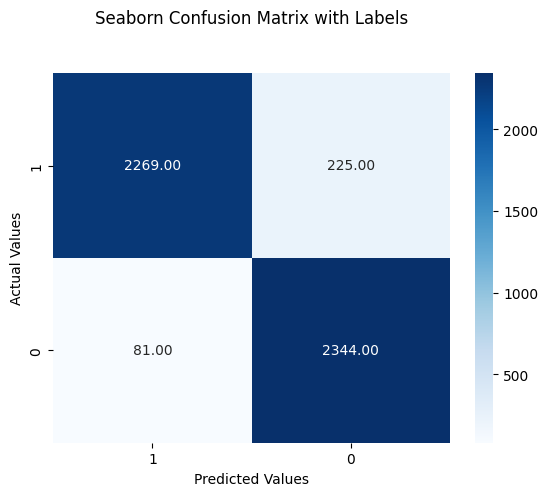

In [49]:
import seaborn as sns

ax = sns.heatmap(confusion_matrix,fmt=".2f", annot=True, cmap="Blues")

ax.set_title('Seaborn Confusion Matrix with Labels\n\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels([1,0])
ax.yaxis.set_ticklabels([1,0])

plt.show()

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test_undersample, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      2494
           1       0.91      0.97      0.94      2425

    accuracy                           0.94      4919
   macro avg       0.94      0.94      0.94      4919
weighted avg       0.94      0.94      0.94      4919



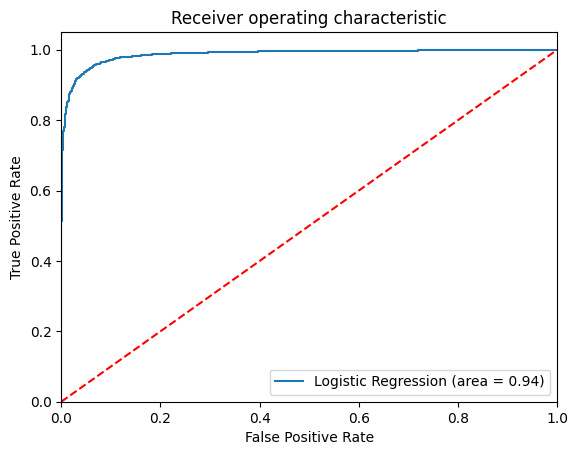

In [51]:
from sklearn.metrics import roc_auc_score, roc_curve

logit_roc_auc = roc_auc_score(y_test_undersample, logreg.predict(X_test_undersample))
fpr, tpr, thresholds = roc_curve(y_test_undersample, logreg.predict_proba(X_test_undersample)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'fraud_detection_model.pkl'